# Introduction to CV2 and Image Processing

## Basic Setup and Cloning the repository

In [ ]:
!git clone https://github.com/vanshg1729/cvit-workshop-2024.git

Cloning into 'cvit-workshop-2024'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 93 (delta 10), reused 85 (delta 8), pack-reused 0
Receiving objects: 100% (93/93), 7.61 MiB | 32.22 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
import os
import sys

REPO_DIR = "/content/cvit-workshop-2024"
assert os.path.exists(REPO_DIR), f"{REPO_DIR} does not exists"

IMAGES_DIR = os.path.join(REPO_DIR, "day1/images")
print(f"{IMAGES_DIR}, exists = {os.path.exists(IMAGES_DIR)}")

/content/cvit-workshop-2024/day1/images, exists = True


In [ ]:
# Importing basic libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(image, cmap_type):
  plt.imshow(image, cmap = cmap_type)
  plt.show()

## OpenCV

### Introduction
OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.
[https://opencv.org/about/]

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/OpenCV_Logo_with_text_svg_version.svg" alt="opencv logo" width="300"/>

### Basic usage
- opening images using cv2 and plotting with plt
- converting from BGR to RGB
- converting to Grayscale (using cv2)
- converting to Grayscale (manually)

### Opening images using OpenCV
1. Open any image from the `images` directory and print the python datatype of the image read and print the image size, also print the image variable

TypeError: Image data of dtype object cannot be converted to float

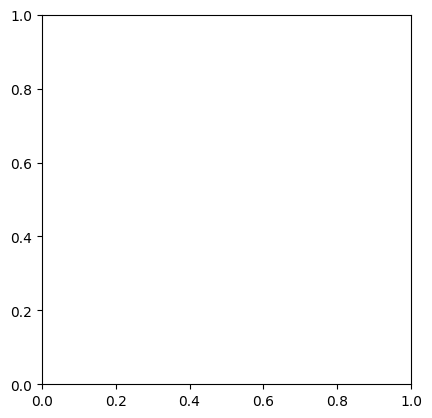

In [ ]:
import cv2
image = cv2.imread("firstimage.png");
plt.imshow(image);

/content/cvit-workshop-2024/day1/images/lena.png True
Type of cv2 read img: <class 'numpy.ndarray'>
Shape of img: (512, 512, 3)


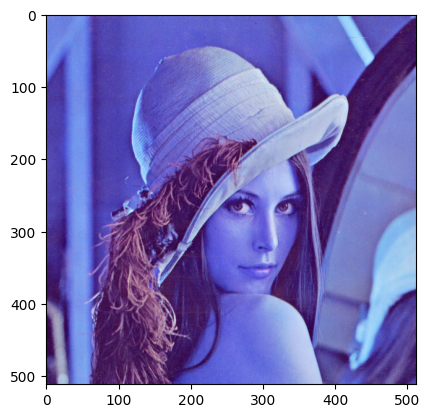

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lena.png")
print(img_path, os.path.exists(img_path))

img = cv2.imread(img_path)
print(f"Type of cv2 read img: {type(img)}")
print(f"Shape of img: {img.shape}")

plt.imshow(img)

### Converting from BGR to RGB
Do you see anything off in the image displayed previously. Now try converting the image to RGB and then display it

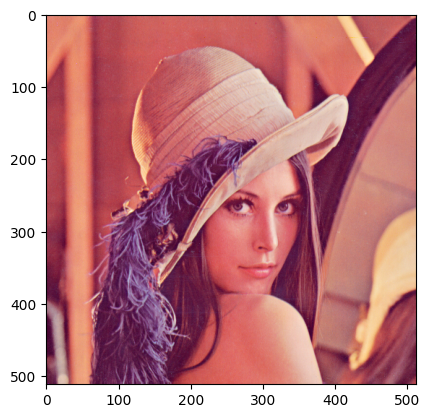

In [ ]:
# Write your solution here
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

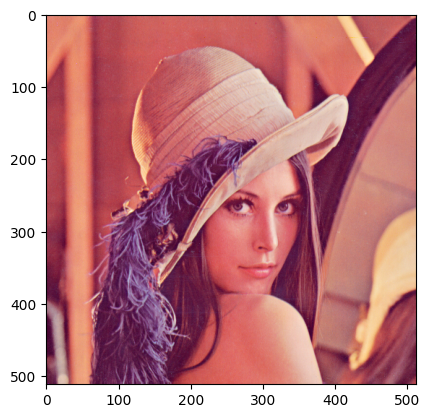

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lena.png")
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

### Converting to Grayscale (using OpenCV)
Now convert the image to grayscale using cv2 display it

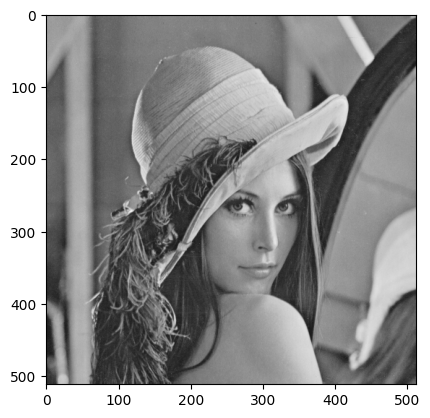

In [ ]:
img_path = os.path.join(IMAGES_DIR, "lena.png")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

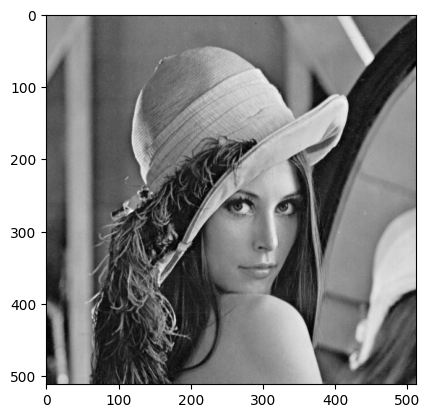

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lena.png")
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# By default matplotlib assumes 3 channels (RGB) of an image
# So you need it change the colormap to gray to display grayscale images
plt.imshow(img_gray, cmap='gray')

### Converting to Grayscale (manually)
Now convert the image to grayscale without using CV2.

int32
int32


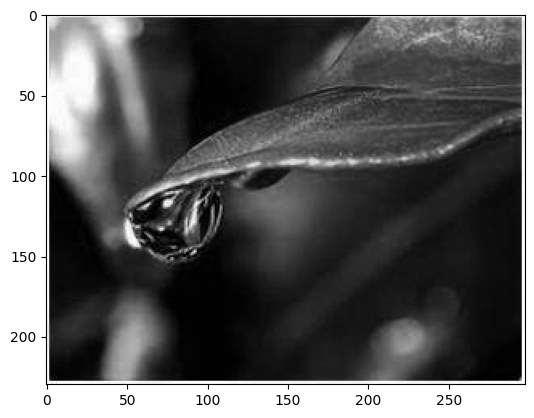

In [ ]:
img_path = os.path.join(IMAGES_DIR, "leaf.jpg")
img = cv2.imread(img_path);

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.int32).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion

img_grayscale = (img[:,:,0]+img[:,:,1]+img[:,:,2])/3
img_grayscale = img_grayscale.astype(np.int32).clip(0, 255) #precautionary
print(img_grayscale.dtype)

plt.imshow(img_grayscale, cmap='gray')

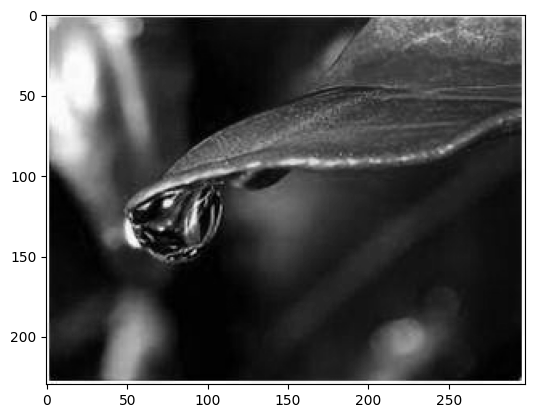

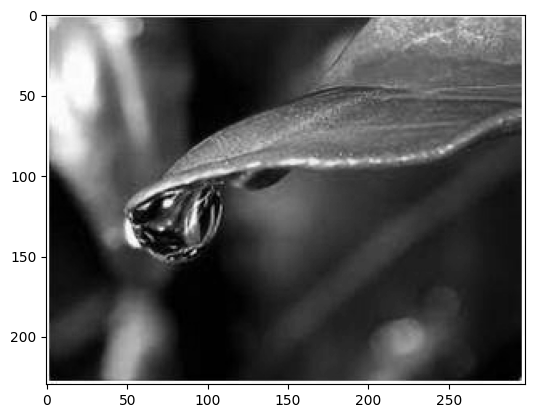

In [ ]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "leaf.jpg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mean gray conversion
img_gray_mean = img[:, :, 0]/3 + img[:, :, 1]/3 + img[:, :, 2]/3
img_gray_mean = img_gray_mean.astype(np.int32).clip(0, 255)
plt.imshow(img_gray_mean, cmap='gray')
plt.show()

# More color accurate grayscaling for humans
img_gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
img_gray = img_gray.astype(np.int32).clip(0, 255)
plt.imshow(img_gray, cmap='gray')
plt.show()


## Basic Image Processing


### Image Histograms
Construct a frequency histogram for each color channel of `bell.jpg`. You can use `plt.bar` for plotting the histogram

<BarContainer object of 256 artists>

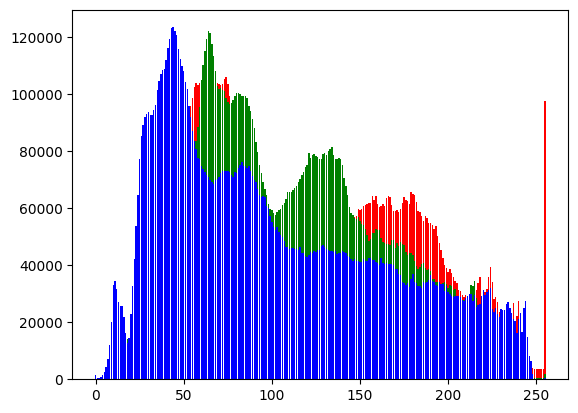

In [ ]:
img_path = os.path.join(IMAGES_DIR, "bell.jpeg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.int32).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion

reds = np.bincount(img[:,:,0].flatten())
plt.bar(list(range(256)), reds, color = "red")

greens = np.bincount(img[:,:,1].flatten())
plt.bar(list(range(256)), greens, color = "green")

blues = np.bincount(img[:,:,2].flatten())
plt.bar(list(range(256)), blues, color = "blue")

In [ ]:
#@title Solution

img = cv2.imread(os.path.join(IMAGES_DIR, "bell.jpeg"))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
print(f"min value : {np.min(img)}, max_value = {np.max(img)}")

# histogram for Red channel
red_freq = np.bincount(img[:, :, 0].flatten())
print(red_freq.shape)

plt.bar(list(range(256)), red_freq, color='red', label='red channel histogram')

# histogram for Green channel
green_freq = np.bincount(img[:, :, 1].flatten())
plt.bar(list(range(256)), green_freq, color='green', label='green channel histogram')

# histogram for Blue channel
blue_freq = np.bincount(img[:, :, 2].flatten())
plt.bar(list(range(256)), blue_freq, color='blue', label='blue channel histogram')

plt.legend()
plt.show()

# histogram for Grayscale Image
gray_freq = np.bincount(img_gray.flatten())
plt.bar(list(range(256)), gray_freq, color='black', label='Gray Channel Histogram')
plt.legend()
plt.show()

### Thresholding
Try binary thresholding the `numbers.png` at different values to see what happens. Can you find the missing number using thresholding ?

Hint : Plot the histogram for all the non-zero values

**Homework**: Perform thresholding on `sudoko.jpg` and find an apt threshold for it.

In [ ]:
img_path = os.path.join(IMAGES_DIR, "numbers.png")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.int32).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion


In [ ]:
#@title Solution
img = cv2.imread(os.path.join(IMAGES_DIR, "numbers.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plotting histogram of non-zero values
img_nonzero = img[img > 0]
hist, bins = np.histogram(img_nonzero, bins=256, range=(0, 255))
plt.bar(bins[:-1], hist)
plt.show()

# Thresholding at a value
thresh_value = 180
img_thresh = np.where((img >= thresh_value), 255, 0)

plt.imshow(img_thresh, cmap='gray')
plt.show()


### Chroma Keying
**Take `fg.jpg` foreground image and put it on `bg.jpg`**.

Can you vectorize the whole operation to make it fast ?

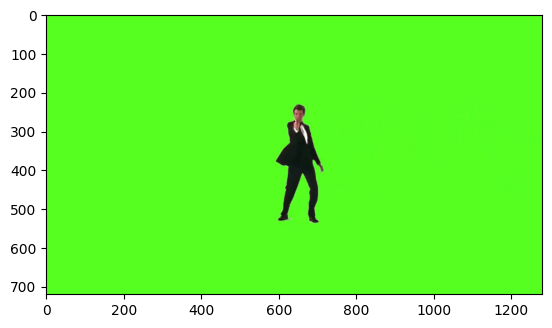

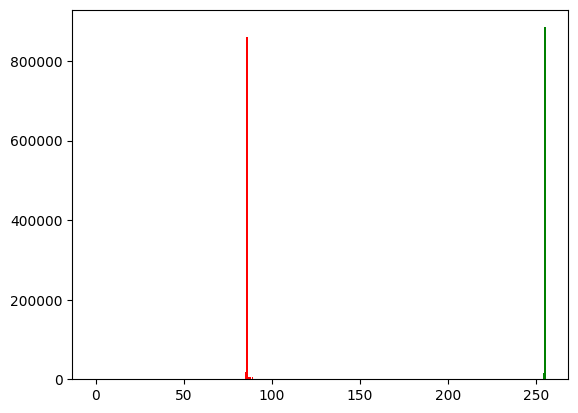

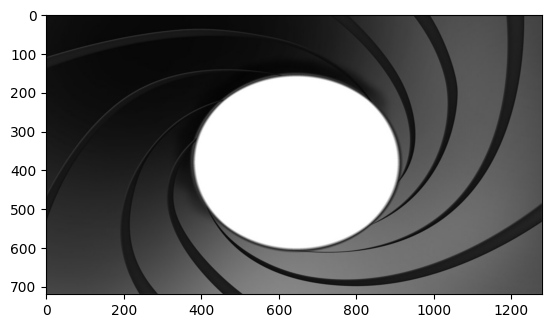

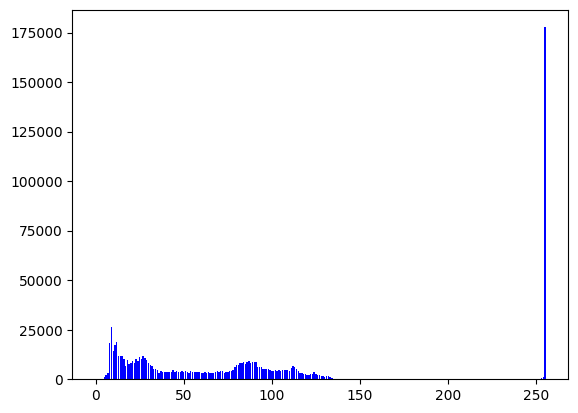

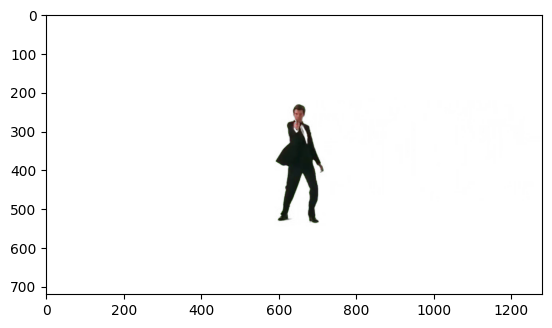

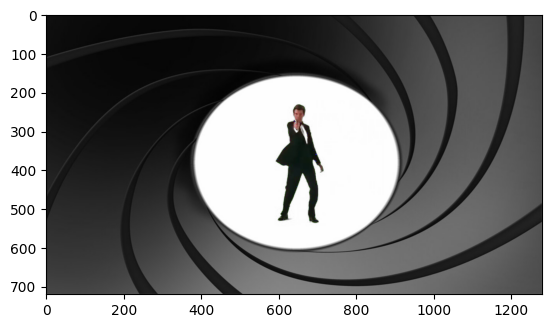

In [ ]:
# for fg.jpg
img_path = os.path.join(IMAGES_DIR, "fg.jpg")
img_1 = cv2.imread(img_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1 = img_1.astype(np.int32).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion
plt.imshow(img_1)
plt.show()

reds = np.bincount(img_1[:,:,0].flatten())
plt.bar(list(range(256)), reds, color = "red")

greens = np.bincount(img_1[:,:,1].flatten())
plt.bar(list(range(256)), greens, color = "green")
plt.show()

# for bg.jpg
img_path = os.path.join(IMAGES_DIR, "bg.jpg")
img_2 = cv2.imread(img_path)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2 = img_2.astype(np.int32).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion

plt.imshow(img_2)
plt.show()

blues = np.bincount(img_2[:,:,2].flatten())
plt.bar(list(range(256)), blues, color = "blue")
plt.show()

img_new = img_1.copy()
[rows, columns, channels] = img_new.shape
for i in range(0, rows):
  for j in range(0, columns):
    if (img_new[i, j, 1] > 150):
      img_new[i, j, 2] = img_new[i, j, 1]
      img_new[i, j, 0] = img_new[i, j, 1]

plt.imshow(img_new);
plt.show()

img_new = img_new + img_2
img_new = img_new.astype(np.uint8).clip(0, 255)
plt.imshow(img_new);
plt.show()

### Emboss (3D Effect)

This is how the input `logo.png` looks like <br/>
![Input Logo](https://i.imgur.com/dF9f1hW.jpeg)


Can you convert it to something which looks like `logoemb.png`
![Embossed Logo](https://i.imgur.com/VZ9PrXU.png)



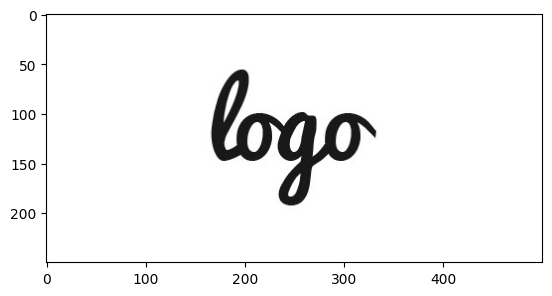

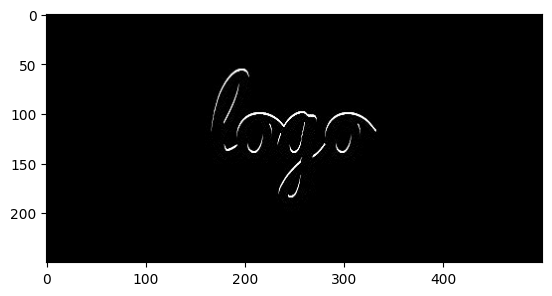

In [ ]:
# idea is to shift the original image diagonally and add (up_shift) and subtract(down_shift) according to the effect

img_path = os.path.join(IMAGES_DIR, "logo.png")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.uint8).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion
plt.imshow(img)
plt.show()

[rows, columns, channels] = img.shape
# img_DiagDown = np.roll(img, 1, axis = 0)
# img_DiagDown = np.roll(img_DiagDown, 1, axis = 1)
# img_DiagUp = np.roll(img, -1, axis = 0)
# img_DiagUp = np.roll(img_DiagUp, -1, axis = 1)

# img_emb = -img_DiagUp/2 - img_DiagDown/2
# img_emb = img_emb.astype(np.uint8).clip(0, 255)
# plt.imshow(img_emb)
# plt.show()

emboss_filter = np.zeros((3, 3))
emboss_filter[0,1] = 2
emboss_filter[2, 1] = -2

img_emb = cv2.filter2D(img, -1, emboss_filter)
plt.imshow(img_emb)
plt.show()

### Barbie Needs YOU, KEN!!!
This is how Barbie looks like without Ken (`barbie_flat.png`): <br/>
<img src="https://i.imgur.com/SZb78XR.png" alt="Barbie Flat" width="600"/>
<br/>

This is how you have to make Barbie look like (`barbie_corrected.png`) <br/>
<img src="https://i.imgur.com/lfprTts.png" alt="Barbie Corrected" width="600"/>

uint8


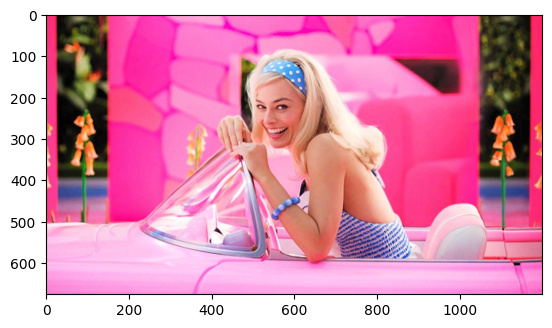

In [ ]:
#idea is to shift the HSV params from the dimmer ones to the brighter ones
#by making use of the reference image

img_path = os.path.join(IMAGES_DIR, "barbie_flat.png")
img_flat = cv2.imread(img_path)
img_flat = cv2.cvtColor(img_flat, cv2.COLOR_BGR2HSV)

# img_path = os.path.join(IMAGES_DIR, "barbie_corrected.png")
# img_correct = cv2.imread(img_path)
# img_correct = cv2.cvtColor(img_correct, cv2.COLOR_BGR2HSV)

# splitting the image into its constituent HSV params
h_flat, s_flat, v_flat = cv2.split(img_flat);

# h_correct, s_correct, v_correct = cv2.split(img_correct)

# finding the difference in the intensities of the desired and the given images
# h_diff = h_flat - h_correct
# s_diff = s_flat - s_correct
# v_diff = v_flat - v_correct

# defining the new HSV params
# h_new = h_flat - h_diff
h_new = (h_flat - np.min(h_flat))/(np.max(h_flat) - np.min(h_flat))*180
s_new = (s_flat - np.min(s_flat))/(np.max(s_flat) - np.min(s_flat))*255
v_new = (v_flat - np.min(v_flat))/(np.max(v_flat) - np.min(v_flat))*255
# s_new = s_flat - s_diff
# v_new = v_flat - v_diff

#  recontructing the image from the new HSV params
img_new = cv2.merge([h_new, s_new, v_new])
img_new = img_new.astype(np.uint8)
img_new = cv2.cvtColor(img_new, cv2.COLOR_HSV2RGB)
plt.imshow(img_new)
plt.show()

### Retro Effect

Take `cycle.png` image: <br/>
<img src="https://i.imgur.com/BAifBji.jpeg" alt="cycle" width="600"/>
<br/>

Add a retro effect to it <br/>
<img src="https://i.imgur.com/wxkC03C.png" alt="cycle retro" width="600"/>

[[0.16597615 0.1665183  0.16706037 ... 0.16706037 0.1665183  0.16597615]
 [0.16663953 0.16718385 0.16772808 ... 0.16772808 0.16718385 0.16663953]
 [0.16730371 0.1678502  0.1683966  ... 0.1683966  0.1678502  0.16730371]
 ...
 [0.16730371 0.1678502  0.1683966  ... 0.1683966  0.1678502  0.16730371]
 [0.16663953 0.16718385 0.16772808 ... 0.16772808 0.16718385 0.16663953]
 [0.16597615 0.1665183  0.16706037 ... 0.16706037 0.1665183  0.16597615]]


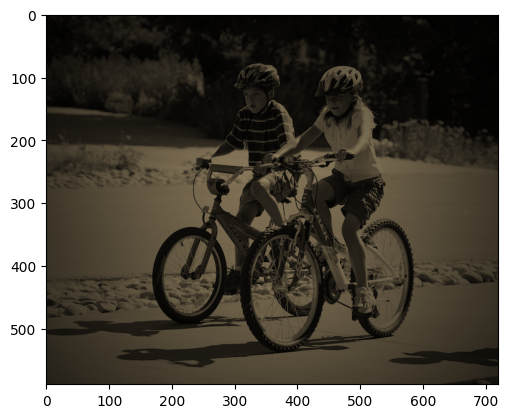

In [ ]:
#idea is to again play in the HSV space

img_path = os.path.join(IMAGES_DIR, "cycle.png")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.uint8).clip(0, 255) # used the conversion here because originally, the img is of uint8 type
# therefore while adding three channels individually (taking mean) it introduces overflow so the conversion

# h, s, v = cv2.split(img)
# print(h)
# h = h + 15

# img = cv2.merge([h, s, v])
# img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
# plt.imshow(img)
# plt.show()

# reds = np.bincount(img[:,:,0].flatten())
# greens = np.bincount(img[:,:,1].flatten())
# blues = np.bincount(img[:,:,2].flatten())

# plt.bar(list(range(256)), reds, color = 'red')
# plt.bar(list(range(256)), greens, color = 'green')
# plt.bar(list(range(256)), blues, color = 'blue')
# plt.show()

# rows, columns, channels = img.shape
# for i in range(0, rows):
#   for j in range(0, columns):
#     if (img[i, j, 0] > 100):
#       img[i, j, 0] = 0
#     elif (img[i, j, 1] > 20):
#       img[i, j, 1] = 0
#     # elif (img[i, j, 2] >= 0):
#     img[i, j, 2] = 0

# plt.imshow(img)
# plt.show()

rows, columns, channels = img.shape

filter_x = cv2.getGaussianKernel(rows, 300)
filter_y = cv2.getGaussianKernel(columns, 300)
filter_retro = filter_y*filter_x.T

#normalising the filter by using the Frobenius Norm
norm_filter_retro = 255*filter_retro/np.linalg.norm(filter_retro)
print(norm_filter_retro)

outR = img[:, :, 0].copy().astype(float)  # Convert to float for calculations
outG = img[:, :, 1].copy().astype(float)
outB = img[:, :, 2].copy().astype(float)

outB = cv2.addWeighted(img[:, :, 2], 0.172, img[:, :, 1], 0.534, 0, outB)
outG = cv2.addWeighted(img[:, :, 2], 0.249, img[:, :, 1], 0.686, 0, outG)
outR = cv2.addWeighted(img[:, :, 2], 0.293, img[:, :, 1], 0.769, 0, outR)
img = cv2.merge([outR, outG, outB])
img_retro = img.copy()
img_retro[:,:,0] = img[:,:,0]*norm_filter_retro.T
img_retro[:,:,1] = img[:,:,1]*norm_filter_retro.T
img_retro[:,:,2] = img[:,:,2]*norm_filter_retro.T
img_retro = img_retro.astype(np.uint8).clip(0, 255)
plt.imshow(img_retro)
plt.show()